In [2]:

import tensorflow as tf
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth set.")
    except RuntimeError as e:
        print(e)

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



GPU memory growth set.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data:", x_train.shape, y_train.shape)
print("Testing data:", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Testing data: (10000, 28, 28) (10000,)


In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)



x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [8]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8875 - loss: 0.3728 - val_accuracy: 0.9759 - val_loss: 0.0742
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9836 - loss: 0.0528 - val_accuracy: 0.9888 - val_loss: 0.0330
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9894 - loss: 0.0332 - val_accuracy: 0.9909 - val_loss: 0.0267
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9931 - loss: 0.0208 - val_accuracy: 0.9881 - val_loss: 0.0363
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9948 - loss: 0.0170 - val_accuracy: 0.9889 - val_loss: 0.0324


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CSV with only wrong predictions saved.
Total wrong predictions: 111
Total correct predictions: 9889
Accuracy: 98.89%


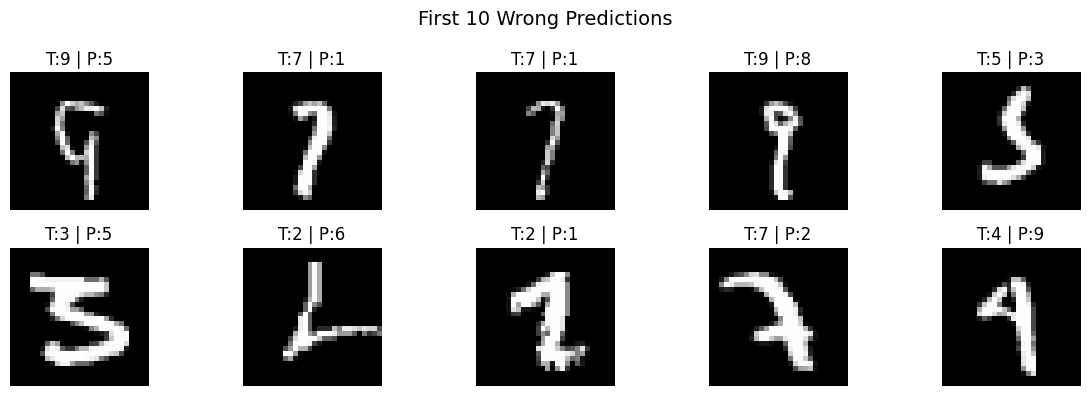

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 2️⃣ Find incorrect predictions
incorrect = np.where(y_pred_classes != y_test)[0]

# 3️⃣ Find correct predictions
correct = np.where(y_pred_classes == y_test)[0]

# 4️⃣ Save wrong predictions to CSV
df_wrong = pd.DataFrame({
    "Index": incorrect,
    "True_Label": y_test[incorrect],
    "Predicted_Label": y_pred_classes[incorrect]
})
df_wrong.to_csv("mnist_wrong_predictions.csv", index=False)
print("CSV with only wrong predictions saved.")

# 5️⃣ Print stats
print("Total wrong predictions:", len(incorrect))
print("Total correct predictions:", len(correct))
print("Accuracy: {:.2f}%".format(len(correct)/len(y_test)*100))

# 6️⃣ Plot first 10 wrong predictions
plt.figure(figsize=(12,4))
for i, idx in enumerate(incorrect[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"T:{y_test[idx]} | P:{y_pred_classes[idx]}")
    plt.axis('off')

plt.suptitle("First 10 Wrong Predictions", fontsize=14)
plt.tight_layout()
plt.show()



In [10]:
# Save the model
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")

Model saved as mnist_cnn_model.h5
